# Example 1

In [1]:
from CircuitCalculator.Circuit.circuit import transform, w
import CircuitCalculator.Circuit.components as cmp
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, ACVoltageSource, Capacitor
from CircuitCalculator.SimpleCircuit.DiagramParser import SchematicDiagramAnalyzer, SchematicDiagramSolution, circuit_parser
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver

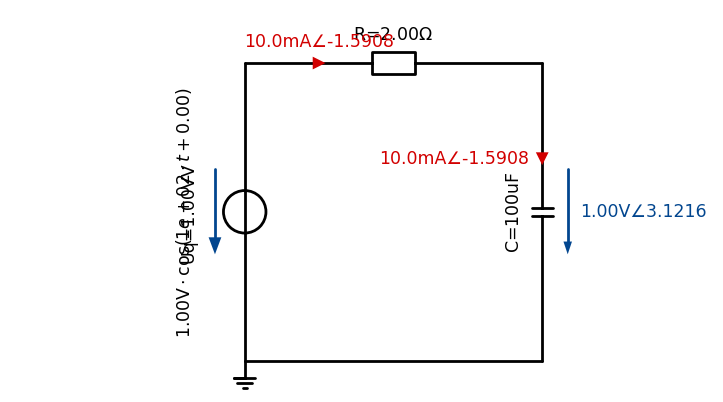

In [3]:
with Schematic(unit=7) as schematic:
    schematic += ACVoltageSource(V=1, w=100, phi=0, name='Uq')
    schematic += Resistor(R=2, name='R').right()
    schematic += Capacitor(C=1e-4, name='C').down()
    schematic += Line().left()
    schematic += Ground()
    solution = nodal_analysis_solver(transform(circuit_parser(schematic), w=100))
    schematic_solution = SchematicDiagramSolution(SchematicDiagramAnalyzer(schematic), solution)
    schematic += schematic_solution.draw_voltage('C')
    schematic += schematic_solution.draw_current('R', ofst=1)
    schematic += schematic_solution.draw_current('C', ofst=.5)